# Pyber Ryde Sharing (Arne Newman)

Observed Trend 1: Urban cities generally have higher ride numbers, followed by suburban cities, then rural cities - this is an intuitive concept due to population density and the dynamics of different city types (e.g., higher population of car owners in rural/suburban areas, lack of accessible parking in urban areas). 

Observed Trend 2: Average fares are highest in rural cities, followed by suburban cities, and finally urban cities. This may be driven by ride length (in distance), as fares are calculated as a function of length. Rural, then suburban areas, will generally have longer distances between rider origin and destination. I would be curious to see the impacts of ride time (as a function of traffic and non-distance variables) and surge pricing on fares.  

Observed Trend 3: Urban areas make up an even greater share of total drivers than total fares or number of rides. One potential reason for this is that there is more competition for drivers in urban areas, likely created by the higher demand for rides (which makes driving more financially attractive). In suburban and rural areas, where there is lower demand for rides (and thus driving is less attractive), drivers are in shorter supply so a smaller number are able to meet the full ride demand.

In [23]:
# Import Dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [24]:
#call raw data files
city_path= "raw_data/city_data.csv"
ride_path = "raw_data/ride_data.csv"

#read raw data files into dataframes
city_data = pd.read_csv(city_path)
ride_data = pd.read_csv(ride_path)

#sorted_city_data = city_data.sort("city", inplace = True)

city_data_df = pd.DataFrame(city_data)
ride_data_df = pd.DataFrame(ride_data)

#preview the data frame
city_data_df.head()

,city,driver_count,type
0,Kelseyland,63,Urban
1,Nguyenbury,8,Urban
2,East Douglas,12,Urban
3,West Dawnfurt,34,Urban
4,Rodriguezburgh,52,Urban


In [25]:
#preview the data frame
ride_data_df.head()

,city,date,fare,ride_id
0,Sarabury,2016-01-16 13:49:27,38.35,5403689035038
1,South Roy,2016-01-02 18:42:34,17.49,4036272335942
2,Wiseborough,2016-01-21 17:35:29,44.18,3645042422587
3,Spencertown,2016-07-31 14:53:22,6.87,2242596575892
4,Nguyenbury,2016-07-09 04:42:44,6.28,1543057793673


In [26]:
all_data = pd.merge(ride_data, city_data, how="left", on="city")

#compare the length of all_data and ride_data... it looks like there are 32 cities with no ride data, so they have blank rows
#(due to the outer join)
print(len(all_data))
print(len(ride_data))
all_data.head()
#list(all_data)

2407
2375


,city,date,fare,ride_id,driver_count,type
0,Sarabury,2016-01-16 13:49:27,38.35,5403689035038,46,Urban
1,South Roy,2016-01-02 18:42:34,17.49,4036272335942,35,Urban
2,Wiseborough,2016-01-21 17:35:29,44.18,3645042422587,55,Urban
3,Spencertown,2016-07-31 14:53:22,6.87,2242596575892,68,Urban
4,Nguyenbury,2016-07-09 04:42:44,6.28,1543057793673,8,Urban


In [27]:
#create three separate data sets by type
urban_data = all_data[all_data["type"] == "Urban"]

suburban_data = all_data[all_data["type"] == "Suburban"]

rural_data = all_data[all_data["type"] == "Rural"]
rural_data.head()


,city,date,fare,ride_id,driver_count,type
2282,Horneland,2016-07-19 10:07:33,12.63,8214498891817,8,Rural
2283,Kinghaven,2016-05-18 23:28:12,20.53,6432117120069,3,Rural
2284,New Johnbury,2016-04-21 08:30:25,56.60,9002881309143,6,Rural
2285,South Joseph,2016-02-17 01:41:29,57.52,7365786843443,3,Rural
2286,Kennethburgh,2016-10-19 13:13:17,24.43,2728236352387,3,Rural


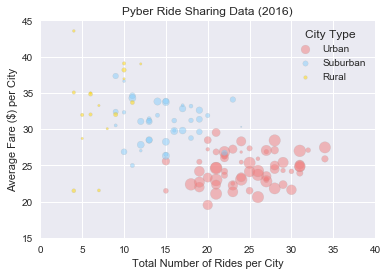

In [28]:
-
#average_fare.head()

In [29]:
#FARSHID SOLUTION (keep for now) BUT IGNORE
grouped_data = all_data.groupby(["city","type"])

#type(grouped_data)
grouped_data.mean().head()

,,fare,ride_id,driver_count
city,type,,,
Alvarezhaven,Urban,23.928710,5.351586e+12,21.0
Alyssaberg,Urban,20.609615,3.536678e+12,67.0
Anitamouth,Suburban,37.315556,4.195870e+12,16.0
Antoniomouth,Urban,23.625000,5.086800e+12,21.0
Aprilchester,Urban,21.981579,4.574788e+12,49.0


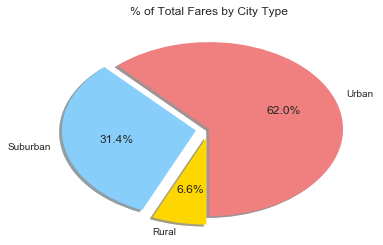

In [30]:
# % of Total Fares by City Type

urban_fares = urban_data["fare"].sum()
suburban_fares = suburban_data["fare"].sum()
rural_fares = rural_data["fare"].sum()


type_fares = [urban_fares, suburban_fares, rural_fares]
explode = [0, 0.1, 0.1]
labels = ["Urban", "Suburban", "Rural"]

plt.pie(type_fares, explode = explode, labels = labels, autopct='%1.1f%%', shadow = True, 
        colors = ["lightcoral", "lightskyblue", "gold"], startangle=270)
plt.title("% of Total Fares by City Type")
plt.show()

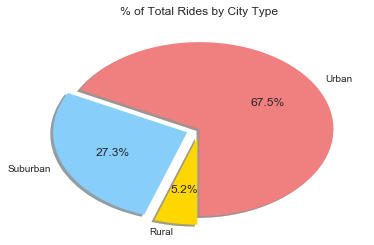

In [31]:
# % of Total Rides by City Type

urban_rides = len(urban_data["fare"])
suburban_rides = len(suburban_data["fare"])
rural_rides = len(rural_data["fare"])

type_rides = [urban_rides, suburban_rides, rural_rides]

explode = [0, 0.1, 0.1]
labels = ["Urban", "Suburban", "Rural"]

plt.pie(type_rides, explode = explode, labels = labels, autopct='%1.1f%%', shadow = True,
        colors = ["lightcoral", "lightskyblue", "gold"],startangle=270)
plt.title("% of Total Rides by City Type")
plt.show()


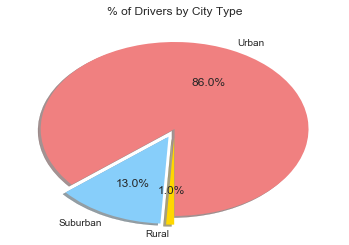

In [32]:
# % of Total Drivers by City Type

drivers_by_type = [all_data[all_data["type"] =="Urban"].sum()["driver_count"],
                  all_data[all_data["type"] =="Suburban"].sum()["driver_count"],
                   all_data[all_data["type"] =="Rural"].sum()["driver_count"]            
                  ]
plt.pie(drivers_by_type, explode = explode, labels = labels, autopct='%1.1f%%', shadow = True,
        colors = ["lightcoral", "lightskyblue", "gold"],startangle=270)
plt.title("% of Drivers by City Type")
plt.show()